# Obligatorio - Taller de Deep Learning

**Fecha de entrega:** 10/12/2024  
**Puntaje máximo:** 50 puntos  

## Obligatorio

El objetivo de este obligatorio es evaluar su conocimiento en Deep Learning mediante la implementación completa de un modelo de segmentación de imágenes basado en el paper [**"U-Net: Convolutional Networks for Biomedical Image Segmentation"**](https://arxiv.org/pdf/1505.04597). Toda la implementación debe realizarse desde cero utilizando PyTorch, y los estudiantes tendrán la libertad de ajustar ciertos hiperparámetros y configuraciones mientras mantengan la esencia del paper original.

### **Competencia en Kaggle**

Además, como parte de este obligatorio, participarán en una competencia privada en Kaggle donde se les proporcionará un dataset de test oculto (sin target). Deberán subir sus predicciones a Kaggle y se evaluarán en función de la métrica **Dice Coefficient (Coeficiente de Dice)**. Esta competencia les permitirá comparar sus resultados con los de sus compañeros en un entorno real de evaluación.

### **Qué es el Dice Coefficient?**
El **Dice Coefficient**, también conocido como F1-score para segmentación, es una métrica utilizada para evaluar la similitud entre la predicción y la verdad del terreno en tareas de segmentación. Se define de la siguiente manera:

$$
\text{Dice} = \frac{2 \cdot |A \cap B|}{|A| + |B|}
$$

Donde:
- \(A\) es el conjunto de píxeles predichos como pertenecientes a la clase positiva.
- \(B\) es el conjunto de píxeles verdaderos pertenecientes a la clase positiva.
- \(|A \cap B|\) es la intersección de \(A\) y \(B\), es decir, los píxeles correctamente predichos como positivos.

Un valor de Dice de **1** indica una predicción perfecta, mientras que un valor de **0** indica que no hay coincidencia entre la predicción y el valor verdadero. Durante la competencia de Kaggle, deberán obtener un puntaje de al menos **0.7** en la métrica Dice para considerarse aprobados.

### **Criterios a Evaluar**

1. **Implementación Correcta del Modelo U-Net (20 puntos):**
   - Construcción de la arquitectura U-Net siguiendo la estructura descrita en el paper, permitiendo ajustes como el número de filtros, funciones de activación y métodos de inicialización de pesos.
   - Se aceptan mejoras como el uso de técnicas adicionales como batch normalization, otras funciones de activación, etc.

2. **Entrenamiento del Modelo (10 puntos):**
   - Configuración adecuada del ciclo de entrenamiento, incluyendo la elección de la función de pérdida y del optimizador (Adam, SGD, etc.).
   - Uso de técnicas de regularización para mejorar la generalización del modelo, como el dropout, normalización de batch y data augmentation.
   - Gráficas y análisis de la evolución del entrenamiento, mostrando las curvas de pérdida y métricas relevantes tanto en el conjunto de entrenamiento como en el de validación.

3. **Evaluación de Resultados (10 puntos):**
   - Evaluación exhaustiva del modelo utilizando métricas de segmentación como **Dice Coefficient**.
   - Análisis detallado de los resultados, incluyendo un análisis de errores para identificar y discutir casos difíciles.
   - Visualización de ejemplos representativos de segmentaciones correctas e incorrectas, comparando con las etiquetas manuales proporcionadas en el dataset.

4. **Participación y Resultados en la Competencia Kaggle (5 puntos):**
   - Participación activa en la competencia de Kaggle, con al menos una (1) subida de predicción.
   - Puntaje obtenido en la tabla de posiciones de Kaggle, evaluado en base al **Dice Coefficient** en el conjunto de test oculto. Es necesario obtener al menos un valor de **0.7** para esta métrica.

   Nota: El **Dice Coefficient** es la métrica utilizada para evaluar la precisión de los modelos de segmentación de imágenes en esta competencia. Un valor de Dice superior a 0.7 es requerido para aprobar esta tarea.

### **Run-Length Encoding (RLE)**

Dado que no se suben las imágenes segmentadas directamente a Kaggle, se requiere usar **Run-Length Encoding (RLE)** para comprimir las máscaras de predicción en una cadena de texto que será evaluada. El **RLE** es una técnica de compresión donde se representan secuencias consecutivas de píxeles en formato `start length`, indicando la posición de inicio y la longitud de cada secuencia de píxeles positivos.

Para calcular el **RLE**, se sigue el siguiente proceso:

1. Se aplanan las máscaras predichas en un solo vector
2. Se identifican los píxeles con valor positivo (1) y se calculan las secuencias consecutivas.
3. Se registra la posición de inicio de cada secuencia y su longitud en formato `start length`.

Este formato comprimido se sube a Kaggle en lugar de las imágenes segmentadas.

#### **Ejemplo de RLE**

```python
import numpy as np

def rle_encode(mask):
    pixels = np.array(mask).flatten(order='F')  # Aplanar la máscara en orden Fortran
    pixels = np.concatenate([[0], pixels, [0]])  # Añadir ceros al principio y final
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1  # Encontrar transiciones
    runs[1::2] = runs[1::2] - runs[::2]  # Calcular longitudes
    return ' '.join(str(x) for x in runs)

mask = np.array([[0, 0, 1, 0, 0],
                 [0, 1, 1, 1, 0],
                 [1, 1, 1, 0, 0],
                 [0, 0, 0, 1, 1]])

print(rle_encode(mask))
```

> **Salida:** 3 1 6 2 9 3 14 1 16 1 20 1


### **Sobre el Dataset**

El dataset proporcionado para esta tarea incluirá imágenes y máscaras para la segmentación de un conjunto específico de clases. El conjunto de entrenamiento estará disponible para su uso durante todo el proceso de desarrollo y pruebas, mientras que el conjunto de validación se mantendrá oculto para la evaluación final en Kaggle.

### **Instrucciones de Entrega**

- Deberán entregar un Jupyter Notebook (.ipynb) que contenga todo el código y las explicaciones necesarias para ejecutar la implementación, el entrenamiento y la evaluación del modelo.
- El notebook debe incluir secciones bien documentadas explicando las decisiones de diseño del modelo, los experimentos realizados, y los resultados obtenidos.
- El código debe estar escrito de manera clara.
- La entrega debe realizarse a través de la plataforma de gestión de ORT (gestion.ort.edu.uy) antes de la fecha límite.

### **Materiales Adicionales**

Para facilitar su trabajo, pueden consultar los siguientes recursos:

- [U-Net: Convolutional Networks for Biomedical Image Segmentation (paper original)](https://arxiv.org/abs/1505.04597)
- [Documentación de PyTorch](https://pytorch.org/docs/stable/index.html)
- [Tutoriales y recursos adicionales en Kaggle](https://www.kaggle.com/)

### **Competencia Kaggle**

https://www.kaggle.com/t/9b4e546084034a59b182aac1ae892640

---


## Requisitos Universitarios

Fecha de entrega: 10/12/2024 hasta las 21:00 horas en gestion.ort.edu.uy (max. 40Mb en formato zip)

### Uso de material de apoyo y/o consulta

Inteligencia Artificial Generativa:

   - Seguir las pautas de los docentes: Se deben seguir las instrucciones específicas de los docentes sobre cómo utilizar la IA en cada curso.
   - Citar correctamente las fuentes y usos de IA: Siempre que se utilice una herramienta de IA para generar contenido, se debe citar adecuadamente la fuente y la forma en que se utilizó.
   - Verificar el contenido generado por la IA: No todo el contenido generado por la IA es correcto o preciso. Es esencial que los estudiantes verifiquen la información antes de usarla.
   - Ser responsables con el uso de la IA: Conocer los riesgos y desafíos, como la creación de “alucinaciones”, los peligros para la privacidad, las cuestiones de propiedad intelectual, los sesgos inherentes y la producción de contenido falso.
   - En caso de existir dudas sobre la autoría, plagio o uso no atribuido de IAG, el docente tendrá la opción de convocar al equipo de obligatorio a una defensa específica e individual sobre el tema.

### Defensa

Fecha de defensa: 11/12/2024

La defensa es obligatoria y eliminatoria. El docente es quien definirá y comunicará la modalidad, y mecánica de defensa. La no presentación a la misma implica la pérdida de la totalidad de los puntos del Obligatorio.

IMPORTANTE:

   1) Inscribirse
   2) Formar grupos de hasta 2 personas del mismo dictado
   3) Subir el trabajo a Gestión antes de la hora indicada (ver hoja al final del documento: “RECORDATORIO”)

Aquellos de ustedes que presenten alguna dificultad con su inscripción o tengan inconvenientes técnicos, por favor contactarse con el Coordinador de cursos o Coordinación adjunta antes de las 20:00h del día de la entrega, a través de los mails crosa@ort.edu.uy / posada_l@ort.edu.uy (matutino) / larrosa@ort.edu.uy (nocturno), o vía Ms Teams.

# Preparación entorno

In [1]:
!python --version

Python 3.10.12


In [ ]:
!pip install torch torchinfo
!pip install scikit-learn
!pip install kaggle
!pip install matplotlib
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 8.8 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 7.8 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 9.5 MB/s eta 0:00:00a 0:00:01m
  Preparing metadata (setup.py) ... done
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=35e2042d81cd174fffad80c04f0be17762e7585544f7e2fc93710ad50e2c77fe
  Stored in directory: /Users/gotero/Library/Caches/pip/wheels/9f/af/22/bf406f913dc7506a485e60dce8143741abd0a92a19337d83a3
Successfully built kaggle


In [ ]:
# Definimos el entorno para interactar con Kaggle
# Debemos subir el archivo kaggle.json previamente
#!mkdir -p /root/.config/kaggle
#!mv kaggle.json /root/.config/kaggle/
#!chmod 600 /root/.config/kaggle/kaggle.json

mkdir: /root: Read-only file system
mv: rename kaggle.json to /root/.config/kaggle/: No such file or directory
chmod: /root/.config/kaggle/kaggle.json: No such file or directory


In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "./.kaggle" 


TypeError: str expected, not int

In [74]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision.utils import make_grid
import torchvision.datasets as datasets

from torchvision.transforms import v2 as T
from torchvision.io import read_image, ImageReadMode

from torchinfo import summary

import matplotlib.pyplot as plt

import os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
)

import numpy as np

import sys
import platform

import PIL
from PIL import Image

import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

from tqdm.notebook import tqdm_notebook

from utils import (
    train,
    train_unet,
    model_calassification_report,
    show_tensor_image,
    show_tensor_images,
    print_log,
)

In [53]:
# definimos el dispositivo que vamos a usar
DEVICE = "cpu"  # por defecto, usamos la CPU
if torch.cuda.is_available():
    DEVICE = "cuda"  # si hay GPU, usamos la GPU
elif torch.backends.mps.is_available():
    DEVICE = "mps"  # si no hay GPU, pero hay MPS, usamos MPS

#NUM_WORKERS = max(os.cpu_count() - 1, 1)
NUM_WORKERS = 0

DEVICE = "cpu"
print(f"Device: {DEVICE}")
print(f"Num Workers: {NUM_WORKERS}")


Device: cpu
Num Workers: 0


In [31]:
# De acuerdo a la documentación de Colab, obtenemos información de la GPU
# en caso de contar con ella.
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

zsh:1: command not found: nvidia-smi


In [56]:
# Constantes

SEED = 34
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
BATCH_SIZE = 32

# Dataset & Dataloader

In [57]:
class PeopleDataset(Dataset):
    def __init__(self, data, masks=None, img_transforms=None, mask_transforms=None):
      self.train_data = data
      self.train_masks = masks
      self.img_transforms = img_transforms
      self.mask_transforms = mask_transforms

      self.images = sorted(os.listdir(self.train_data))
      self.masks = sorted(os.listdir(self.train_masks))

      print(f"Valor de la transformación pasada como parámetro: ",mask_transforms)


    def __len__(self):
      if self.train_masks is not None:
        assert len(self.images) == len(self.masks), 'incompatibilidad de imágenes y máscaras'
      return len(self.images)

    def __getitem__(self, idx):
      # Obtenemos los paths de las imágenes
      img_path = os.path.join(self.train_data, self.images[idx])
      mask_path = os.path.join(self.train_masks, self.masks[idx])

      # Abrimos las imágenes y máscara
      # image = Image.open(img_path)
      # mask = Image.open(mask_path)

      image = read_image(img_path)
      mask = read_image(mask_path)

      # Verificamos si existen transformaciones, y en caso que sí
      # las aplicamos
      if self.img_transforms:
        image = self.img_transforms(image)
      if self.mask_transforms is not None:
        mask = self.mask_transforms(mask)


      img = image.to(DEVICE)
      # Nos quedamos con una sola capa de la imagen, ya que todas son iguales
      msk = mask[0].to(DEVICE)

      return img, msk

In [ ]:
# Descargamos el dataset
!kaggle competitions download -c tdl-segmentacion

100% 2.14G/2.14G [01:39<00:00, 23.5MB/s]
100% 2.14G/2.14G [01:39<00:00, 23.0MB/s]


In [34]:
# Descomprimimos el dataset
!unzip -q tdl-segmentacion.zip

In [58]:
TRAIN_PATH = 'train/images/'
TRAIN_MASK_PATH = 'train/masks/'
TEST_PATH = 'test/images/'

transform_data = T.Compose([
   T.Resize((224, 224))])

target_transform = T.Compose([
    T.Resize((224, 224))])

full_dataset = PeopleDataset(data=TRAIN_PATH, masks=TRAIN_MASK_PATH, img_transforms=transform_data, mask_transforms=target_transform)

TRAIN_SIZE = int(len(full_dataset)*0.8)
VAL_SIZE = len(full_dataset) - TRAIN_SIZE

train_dataset, val_dataset = random_split(full_dataset, [TRAIN_SIZE, VAL_SIZE])

test_dataset = PeopleDataset(data=TEST_PATH, masks=None, img_transforms=transform_data, mask_transforms=None)


def get_data_loaders(batch_size):

    train_loader = DataLoader(
        train_dataset, batch_size=batch_size, shuffle=True, num_workers=NUM_WORKERS
    )

    val_loader = DataLoader(
        val_dataset, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS
    )

    test_loader = DataLoader(
        test_dataset, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS
    )

    return train_loader, val_loader, test_loader

Valor de la transformación pasada como parámetro:  Compose(    Resize(size=[224, 224], interpolation=InterpolationMode.BILINEAR, antialias=True))
Valor de la transformación pasada como parámetro:  None


In [59]:
# Obtenemos los dataloaders
train_loader, val_loader, test_loader = get_data_loaders(BATCH_SIZE)

In [60]:
# Testeamos el dataloader
# obteniendo un minibatch
imgs, masks = next(iter(train_loader))
for i in range(len(imgs)):
  print(imgs[i].shape, masks[i].shape)
print(imgs.shape, masks.shape)
print(imgs.min(), imgs.max())

torch.Size([3, 224, 224]) torch.Size([224, 224])
torch.Size([3, 224, 224]) torch.Size([224, 224])
torch.Size([3, 224, 224]) torch.Size([224, 224])
torch.Size([3, 224, 224]) torch.Size([224, 224])
torch.Size([3, 224, 224]) torch.Size([224, 224])
torch.Size([3, 224, 224]) torch.Size([224, 224])
torch.Size([3, 224, 224]) torch.Size([224, 224])
torch.Size([3, 224, 224]) torch.Size([224, 224])
torch.Size([3, 224, 224]) torch.Size([224, 224])
torch.Size([3, 224, 224]) torch.Size([224, 224])
torch.Size([3, 224, 224]) torch.Size([224, 224])
torch.Size([3, 224, 224]) torch.Size([224, 224])
torch.Size([3, 224, 224]) torch.Size([224, 224])
torch.Size([3, 224, 224]) torch.Size([224, 224])
torch.Size([3, 224, 224]) torch.Size([224, 224])
torch.Size([3, 224, 224]) torch.Size([224, 224])
torch.Size([3, 224, 224]) torch.Size([224, 224])
torch.Size([3, 224, 224]) torch.Size([224, 224])
torch.Size([3, 224, 224]) torch.Size([224, 224])
torch.Size([3, 224, 224]) torch.Size([224, 224])
torch.Size([3, 224, 

In [61]:
def plot_mini_batch(imgs, masks, show_mask=True):
  '''
  Función para mostrar un mini batch de imágenes y máscaras
  '''
  plt.figure(figsize=(20,10))
  for i in range(BATCH_SIZE):
    plt.subplot(4, 8, i+1)
    # Permutamos al tratarse de un tensor
    img=imgs[i,...].permute(1,2,0).to(DEVICE).cpu().numpy()
    mask=masks[i,...].to(DEVICE).cpu().numpy()
    plt.imshow(img)
    plt.axis('off')
    # Incluimos la máscara
    if show_mask:
      plt.imshow(mask[0], alpha=0.6, cmap='gray',vmin=0,vmax=1)
    plt.axis('off')
  plt.tight_layout()
  plt.show()

IndexError: string index out of range

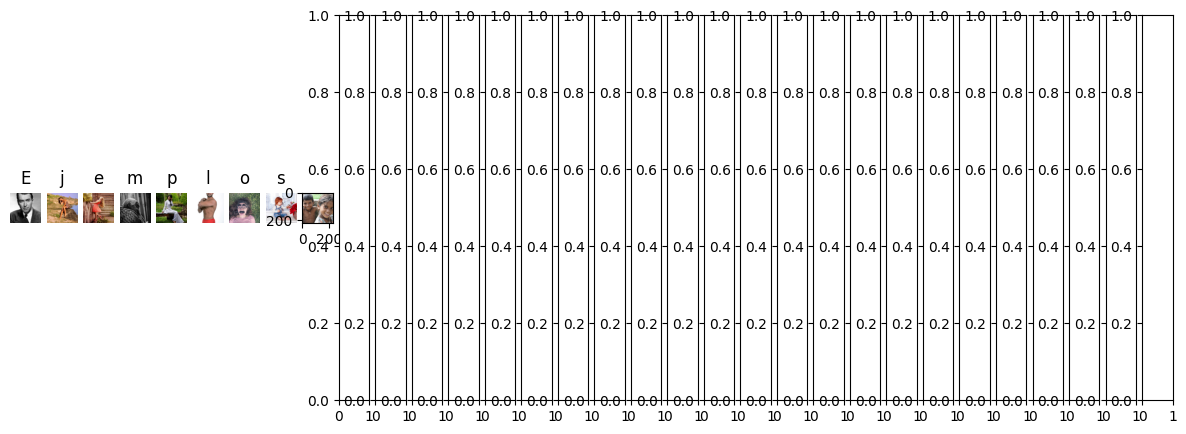

In [62]:
# Mostramos un mini batch de las imágenes
# plot_mini_batch(imgs, masks, True)

# show_tensor_image(img[BATCH_SIZE-1], title="Imágen", vmin=0, vmax=255)

# show_tensor_images(imgs, title="Imágen", vmin=0, vmax=255)
show_tensor_images(imgs, titles="Ejemplos", figsize=(15, 5), vmin=0, vmax=255)
# Mostramos a continuación que cualquiera de las capas
# de la máscara, contienen el mismo valor
# plt.imshow(masks[BATCH_SIZE-1][2], cmap='gray', vmin=0, vmax=1)

# Modelo


Dada la estructura de la U-Net, y la repetición de los bloques de
convolución tanto en la sección de down-sampling como en la de
up-sampling, crearemos clases con la estructura de la
convolución. De esta forma, simplificaremos el
código parametrizando dichas convoluciones
de acuerdo a la etapa de la red en la
que nos encontremos.

In [ ]:
# class Conv_3x3_block(nn.Module):
#   def __init__(self, channels_in, channels_out):
#     super(Conv_3x3_block, self).__init__()
#     # Utilizaremos padding para que las imágenes no se modifiquen
#     self.conv1 = nn.Conv2d(channels_in, channels_out, kernel_size=3, stride=1, padding=1)
#   def forward(self, x):
#     return self.conv1(x)

In [ ]:
# class Double_Conv(nn.Module):
#   def __init__(self, channels_in, channels_out):
#     super(Double_Conv, self).__init__()
#     self.double_conv = nn.Sequential(
#         Conv_3x3_block(channels_in, channels_out),
#         # Vamos a normalizar los datos para facilitar
#         # el entrenamiento.
#         nn.BatchNorm2d(channels_out),
#         nn.ReLU(),
#         Conv_3x3_block(channels_out, channels_out),
#         nn.BatchNorm2d(channels_out),
#         nn.ReLU()
#     )
#   def forward(self, x):
#     return self.double_conv(x)

In [ ]:
# # Vamos a comenzar con la primera sección de la U-Net
# class Down_conv_encoder(nn.Module):
#   def __init__(self,  channels_in, channels_out):
#     super(Down_conv_encoder, self).__init__()
#     self.down_sampling = nn.Sequential(
#                         nn.MaxPool2d(2,2),
#                         Double_Conv(channels_in, channels_out)
#                       )
#   def forward(self, x):
#     return self.down_sampling(x)

In [ ]:
# # Ahora continuamos con la sección del up-sampling de la U-Net
# class Up_conv_decoder(nn.Module):
#   def __init__(self, channels_in, channels_out):
#     super(Up_conv_decoder, self).__init__()
#     self.up_sampling = nn.Sequential(
#                         #nn.Upsample(scale_factor=2, mode='bicubic'),
#                         nn.ConvTranspose2d(channels_in, channels_out, kernel_size=2, stride=2),
#                         nn.Conv2d(channels_in, channels_in//2, kernel_size=1, stride=1)
#                         )
#     self.decoder=Double_Conv(channels_in, channels_out)

#     # x2: representa el skip connection
#     #     proveniente de la sección la
#     #     etapa de down sampling

#   def forward(self, x1, x2):
#     x1 = self.up_sampling(x1)
#     # Concatenamos en la dimensión de los canales
#     # La dim=0 corresponde con la dimensión
#     # del batch.
#     x = torch.cat([x2, x1], dim=1)
#     return self.decoder(x)


Ahora, vamos a ensamblar los diferentes componentes para finalmente
armar la U-Net de acuerdo al paper original.

In [ ]:
# class UNET(nn.Module):
#   def __init__(self, channels_in, channels, num_classes):
#     super(UNET, self).__init__()
#     self.encoder_1 = Double_Conv(channels_in, channels)
#     self.encoder_2 = Down_conv_encoder(channels, 2*channels)
#     self.encoder_3 = Down_conv_encoder(2*channels, 4*channels)
#     self.encoder_4 = Down_conv_encoder(4*channels, 8*channels)
#     self.encoder_5 = Down_conv_encoder(8*channels, 16*channels)

#     self.decoder_1 = Up_conv_decoder(16*channels, 8*channels)
#     self.decoder_2 = Up_conv_decoder(8*channels, 4*channels)
#     self.decoder_3 = Up_conv_decoder(4*channels, 2*channels)
#     self.decoder_4 = Up_conv_decoder(2*channels, channels)

#     self.last_conv = nn.Conv2d(channels, num_classes, kernel_size=1, stride=1)

#   def forward(self, x):
#     x1 = self.encoder_1(x)
#     x2 = self.encoder_2(x1)
#     x3 = self.encoder_3(x2)
#     x4 = self.encoder_4(x3)

#     x5 = self.encoder_5(x4)

#     u1 = self.decoder_1(x5, x4)
#     u2 = self.decoder_2(u1, x3)
#     u3 = self.decoder_3(u2, x2)
#     u4 = self.decoder_4(u3, x1)

#     return self.last_conv(u4)

In [63]:
class Conv_3_k(nn.Module):
    def __init__(self, channels_in, channels_out):
        super().__init__()
        self.conv1 = nn.Conv2d(channels_in, channels_out, kernel_size=3, stride=1, padding=1)
    def forward(self, x):
        return self.conv1(x)

class Double_Conv(nn.Module):
    '''
    Double convolution block for U-Net
    '''
    def __init__(self, channels_in, channels_out):
        super().__init__()
        self.double_conv = nn.Sequential(
                           Conv_3_k(channels_in, channels_out),
                           nn.BatchNorm2d(channels_out),
                           nn.ReLU(),

                           Conv_3_k(channels_out, channels_out),
                           nn.BatchNorm2d(channels_out),
                           nn.ReLU(),
                            )
    def forward(self, x):
        return self.double_conv(x)

class Down_Conv(nn.Module):
    '''
    Down convolution part
    '''
    def __init__(self, channels_in, channels_out):
        super().__init__()
        self.encoder = nn.Sequential(
                        nn.MaxPool2d(2,2),
                        Double_Conv(channels_in, channels_out)
                        )
    def forward(self, x):
        return self.encoder(x)

class Up_Conv(nn.Module):
    '''
    Up convolution part
    '''
    def __init__(self,channels_in, channels_out):
        super().__init__()
        self.upsample_layer = nn.Sequential(
                        nn.Upsample(scale_factor=2, mode='bicubic'),
                        nn.Conv2d(channels_in, channels_in//2, kernel_size=1, stride=1)
                        )
        self.decoder = Double_Conv(channels_in, channels_out)

    def forward(self, x1, x2):
        '''
        x1 - upsampled volume
        x2 - volume from down sample to concatenate
        '''
        x1 = self.upsample_layer(x1)
        x = torch.cat([x2, x1],dim=1)
        return self.decoder(x)

class UNET(nn.Module):
    '''
    UNET model
    '''
    def __init__(self, channels_in, channels, num_classes):
        super().__init__()
        self.first_conv = Double_Conv(channels_in, channels) #64, 224, 224
        self.down_conv1 = Down_Conv(channels, 2*channels) # 128, 112, 112
        self.down_conv2 = Down_Conv(2*channels, 4*channels) # 256, 56, 56
        self.down_conv3 = Down_Conv(4*channels, 8*channels) # 512, 28, 28

        self.middle_conv = Down_Conv(8*channels, 16*channels) # 1024, 14, 14

        self.up_conv1 = Up_Conv(16*channels, 8*channels)
        self.up_conv2 = Up_Conv(8*channels, 4*channels)
        self.up_conv3 = Up_Conv(4*channels, 2*channels)
        self.up_conv4 = Up_Conv(2*channels, channels)

        self.last_conv = nn.Conv2d(channels, num_classes, kernel_size=1, stride=1)

    def forward(self, x):
        x1 = self.first_conv(x)
        x2 = self.down_conv1(x1)
        x3 = self.down_conv2(x2)
        x4 = self.down_conv3(x3)

        x5 = self.middle_conv(x4)

        u1 = self.up_conv1(x5, x4)
        u2 = self.up_conv2(u1, x3)
        u3 = self.up_conv3(u2, x2)
        u4 = self.up_conv4(u3, x1)

        return self.last_conv(u4)

In [64]:
summary(UNET(3, 64, 2), input_size=(BATCH_SIZE, 3, 224, 224))

Layer (type:depth-idx)                        Output Shape              Param #
UNET                                          [32, 2, 224, 224]         --
├─Double_Conv: 1-1                            [32, 64, 224, 224]        --
│    └─Sequential: 2-1                        [32, 64, 224, 224]        --
│    │    └─Conv_3_k: 3-1                     [32, 64, 224, 224]        1,792
│    │    └─BatchNorm2d: 3-2                  [32, 64, 224, 224]        128
│    │    └─ReLU: 3-3                         [32, 64, 224, 224]        --
│    │    └─Conv_3_k: 3-4                     [32, 64, 224, 224]        36,928
│    │    └─BatchNorm2d: 3-5                  [32, 64, 224, 224]        128
│    │    └─ReLU: 3-6                         [32, 64, 224, 224]        --
├─Down_Conv: 1-2                              [32, 128, 112, 112]       --
│    └─Sequential: 2-2                        [32, 128, 112, 112]       --
│    │    └─MaxPool2d: 3-7                    [32, 64, 112, 112]        --
│    │    └

Como puede observarse en el resumen, el modelo y su arquitectura hacen computacionalmente pesado el proceso. De lo anterior, puede observarse
que se requieren unos 14 GB de memoria RAM aproximadamente por cada
"forward" de un batch. Esto podría tener implicancias en el entrenamiento
ya que dados los recursos de hardware, es posible que se tengan que
variar tanto el BATCH_SIZE, como el tamaño de las imágenes a procesar.

In [65]:
# Definimos una función de test, y observamos el shape
# del modelo luego de la predicción
def test():
    x = torch.randn((32, 3, 224, 224))
    model = UNET(3, 64, 2)
    return model(x)

preds = test()
print(preds.shape)

torch.Size([32, 2, 224, 224])


# Entrenamiento

Probemos inicialmente un entrenamiento del modelo, sin realizar ninguna manipulación de las imágenes más allá de modificar su tamaño a 224x224 para mantener un tamaño reducido y no sobrecargar la memoria.

In [66]:
def accuracy(model, loader):
    correct = 0
    intersection = 0
    denom = 0
    union = 0
    total = 0
    cost = 0.
    model = model.to(device=device)
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=DEVICE, dtype = torch.float32)
            y = y.to(device=DEVICE, dtype = torch.long).squeeze(1)
            scores = model(x)
            cost += (F.cross_entropy(scores, y)).item()
            # standard accuracy not optimal
            preds = torch.argmax(scores, dim=1)
            correct += (preds == y).sum()
            total += torch.numel(preds)
            #dice coefficient
            intersection += (preds*y).sum()
            denom += (preds + y).sum()
            dice = 2*intersection/(denom + 1e-8)
            #intersection over union
            union += (preds + y - preds*y).sum()
            iou = (intersection)/(union + 1e-8)

        return cost/len(loader), float(correct)/total, dice, iou

In [67]:

def train(model, optimiser, scheduler = None, epochs = 100, store_every = 25):
    model = model.to(device=DEVICE)
    for epoch in range(epochs):
        train_correct_num = 0
        train_total = 0
        train_cost_acum = 0.
        for mb, (x, y) in enumerate(train_loader, start=1):
            model.train()
            x = x.to(device=DEVICE, dtype=torch.float32)
            y = y.to(device=DEVICE, dtype=torch.long).squeeze(1)
            scores = model(x)
            cost = F.cross_entropy(input=scores, target=y)
            optimiser.zero_grad()
            cost.backward()
            optimiser.step()

            if scheduler:
                scheduler.step()

            train_predictions = torch.argmax(scores, dim=1)
            train_correct_num += (train_predictions == y).sum()
            train_total += torch.numel(train_predictions)
            train_cost_acum += cost.item()
            if mb%store_every == 0:
                val_cost, val_acc, dice, iou = accuracy(model, val_loader)
                train_acc = float(train_correct_num)/train_total
                train_cost_every = float(train_cost_acum)/mb
                print(f'epoch: {epoch}, mb: {mb}, train cost: {train_cost_every:.4f}, val cost: {val_cost:.4f},'
                      f'train acc: {train_acc:.4f}, val acc: {val_acc:.4f},'
                      f'dice: {dice:.4f}, iou: {iou:.4f}')
                    # Save data
                    #train_acc_history.append(train_acc)
                    #train_cost_history.append(train_cost_every)
        #train_acc = float(train_correct_num)/train_total
        #train_cost_every = float(train_cost_acum)/len(train_loader)
        # return train_acc_history ... etc

In [68]:
def find_lr(model, optimiser, start_val = 1e-6, end_val = 1, beta = 0.99, loader = train_loader):
    n = len(loader) - 1
    factor = (end_val / start_val)**(1/n)
    lr = start_val
    optimiser.param_groups[0]['lr'] = lr #this allows you to update the learning rate
    avg_loss, loss, acc = 0., 0., 0.
    lowest_loss = 0.
    batch_num = 0
    losses = []
    log_lrs = []
    accuracies = []
    model = model.to(device=DEVICE)
    for i, (x, y) in enumerate(loader, start=1):
        x = x.to(device = DEVICE, dtype = torch.float32)
        y = y.to(device = DEVICE, dtype = torch.long).squeeze(1)
        optimiser.zero_grad()
        scores = model(x)
        cost = F.cross_entropy(input=scores, target=y)
        loss = beta*loss + (1-beta)*cost.item()
        #bias correction
        avg_loss = loss/(1 - beta**i)

        preds = torch.argmax(scores, dim=1)
        acc_ = (preds == y).sum()/torch.numel(scores)
#         acc = beta*acc + (1-beta)*acc_.item()
#         avg_acc = acc/(1 - beta**i)
        #if loss is massive stop
        if i > 1 and avg_loss > 4 * lowest_loss:
            print(f'from here{i, cost.item()}')
            return log_lrs, losses, accuracies
        if avg_loss < lowest_loss or i == 1:
            lowest_loss = avg_loss

        accuracies.append(acc_.item())
#         accuracies.append(avg_acc)
        losses.append(avg_loss)
        log_lrs.append(lr)
        #step
        cost.backward()
        optimiser.step()
        #update lr
        print(f'cost:{cost.item():.4f}, lr: {lr:.4f}, acc: {acc_.item():.4f}')
        lr *= factor
        optimiser.param_groups[0]['lr'] = lr

    return log_lrs, losses, accuracies

In [69]:
# define the model and look for learning rate
torch.manual_seed(42)
model = UNET(3, 4, 2)
optimiser_unet = torch.optim.SGD(model.parameters(),
                                 lr=0.01, momentum=0.95,
                                 weight_decay=1e-4)

lg_lr, losses, accuracies = find_lr(model, optimiser_unet, start_val=1e-6, end_val=10)

cost:0.7389, lr: 0.0000, acc: 0.2478
cost:0.7493, lr: 0.0001, acc: 0.2330
cost:0.7018, lr: 0.0032, acc: 0.2847
cost:0.6986, lr: 0.1778, acc: 0.2762
cost:0.7225, lr: 10.0000, acc: 0.2588


In [75]:

model = UNET(3,64, 2).to(DEVICE)

train_unet(
    model=model,
    optimizer=optim.SGD(model.parameters(), lr=0.01),
    criterion=nn.CrossEntropyLoss().to(DEVICE),
    train_loader=train_loader,
    val_loader=val_loader,
    device=DEVICE,
    patience=5,
    epochs=10,
    log_fn=print_log,
    log_every=1,
)

RuntimeError: Input type (unsigned char) and bias type (float) should be the same